In [1]:
from canny_edge_detector import CannyEdgeDetector
import imageio 
import matplotlib.pyplot as plt
from utils import rgb2gray

In [2]:
from scipy import ndimage

In [3]:
c = CannyEdgeDetector()

/tmp/ipykernel_6429/8047560.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  read_image = imageio.imread('../test.jpg')


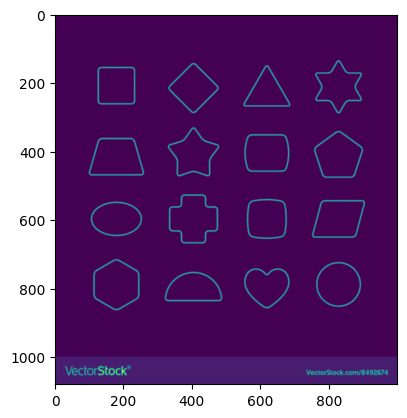

In [4]:
read_image = imageio.imread('../test.jpg')
gray_input_img = rgb2gray(read_image)
blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)
plt.imshow(blur_img)
plt.show()

In [5]:
x_grad,y_grad = c.get_gradients(image=gray_input_img)

In [6]:
grad_magnitude = c.get_gradient_magnitude(x_grad,y_grad)

In [7]:
grad_direction = c.get_gradient_direction(x_grad,y_grad)

In [8]:
closest_dir = c.closest_dir_function(grad_direction)

In [9]:
thinned_output = c.non_maximal_suppressor(grad_magnitude, closest_dir)

In [10]:
output_img = c.hysteresis_thresholding(thinned_output)

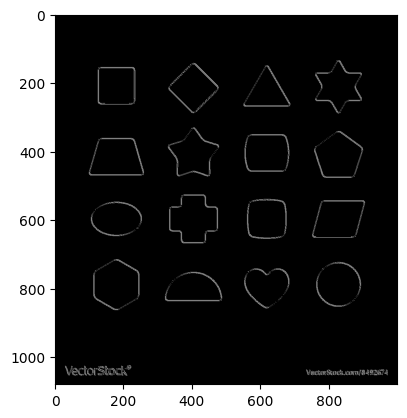

In [11]:
plt.imshow(output_img, cmap = plt.get_cmap('gray'))
plt.show()

In [12]:
output_img.shape

(1080, 1000)

In [13]:
import numpy as np
your_array = (output_img * 255).astype(np.uint8)
imageio.imwrite("a.jpg", your_array)
